In [1339]:
#Import package
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize


In [1340]:
#load Dataset
data_analyst_df = pd.read_csv('/Users/nuel/neuefische/Capstone-Project-/dataset/DataAnalyst.csv')
data_scientist_df = pd.read_csv('/Users/nuel/neuefische/Capstone-Project-/dataset/DataScientist.csv')
google_job = pd.read_csv('/Users/nuel/neuefische/Capstone-Project-/dataset/gsearch_jobs 3.csv')


In [1341]:
#Rename Columns to lower and replace white spaces with Underscore
data_analyst_df.rename(columns=lambda x : x.lower(), inplace=True)
data_analyst_df.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
data_scientist_df.rename(columns=lambda x : x.lower(), inplace=True)
data_scientist_df.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
google_job.rename(columns=lambda x : x.lower(), inplace=True)
google_job.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)


In [1342]:
#data_analyst_df.head(2)
google_job.head()

,unnamed:_0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,State of Oklahoma,"Oklahoma City, OK",via DisABLEDperson.com,Job Posting Title\nData Analyst\n...\nAgency\n...,"['16 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['go']
1,1,1,Data Analyst (Marketing),Entain,United States,via Entain Careers,About The Role\n\nAbout Us...\n\nWe’re Entain....,"['15 hours ago', 'Full-time', 'No degree menti...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgKE1hcmtldG...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'tableau', 'python', 'r', 'go']"
2,2,2,People Analytics Data Analyst (Talent Acquisit...,General Motors,"Topeka, KS",via Kale Jobs,Job Description\nPeople Analytics CoE (Communi...,"['15 hours ago', 'Full-time', 'No degree menti...",eyJqb2JfdGl0bGUiOiJQZW9wbGUgQW5hbHl0aWNzIERhdG...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'power_bi', 'python', 'r']"
3,3,3,Data Analyst,Pernod Ricard,United States,via Black Fly Media,Pernod Ricard is now hiring Data Analyst in Un...,"['15 hours ago', '20 an hour', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,...,NaN,20,an hour,20.0,NaN,NaN,20.0,NaN,41600.0,"['sql', 'power_bi', 'jira', 'snowflake', 'pyth..."
4,4,4,Sr Systems Data Analyst,General Dynamics Information Technology,"Wichita, KS",via USA Job Spot,Type of Requisition: Regular\n\nClearance Leve...,"['3 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJTciBTeXN0ZW1zIERhdGEgQW5hbH...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'tableau', 'python', 'excel', 'r']"


In [1343]:
data_analyst_df = data_analyst_df.rename_axis('index').reset_index()

In [1344]:
data_analyst_df2 = data_analyst_df[['job_title', 'job_description']].copy()
data_scientist_df2 = data_scientist_df[['job_title', 'job_description']].copy()
google_job_df2 = google_job[['title', 'description']].copy()

In [1345]:
data_analyst_df2.head()

,job_title,job_description
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...


In [1346]:
#Join Data Analyst Dataset and Data Scientist Dataset
analyst_scientist_df = pd.concat([data_analyst_df2, data_scientist_df2], ignore_index=True)

In [1347]:
analyst_scientist_df.head()

,job_title,job_description
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...


In [1348]:
#lets rename columns of the google job dataset
google_job_df2 = google_job_df2.rename(columns={'title': 'job_title', 'description': 'job_description'})

In [1349]:
#join google dataset to the data analyst /scientist dataset
master_df = pd.concat([analyst_scientist_df, google_job_df2], ignore_index=True)

In [1350]:
master_df.head()

,job_title,job_description
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...


In [1351]:
#master_df = master_df.reset_index()

In [1352]:
master_df.drop_duplicates(inplace=True)

In [1353]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6867 entries, 0 to 8130
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_title        6867 non-null   object
 1   job_description  6867 non-null   object
dtypes: object(2)
memory usage: 160.9+ KB


In [1354]:
master_df.head()

,job_title,job_description
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...


In [1355]:
#Tokenization

In [1356]:
#job title column to lower case
master_df.job_title = master_df.job_title.str.lower()

In [1357]:
#job title column: text to word

master_df['job_title'] = master_df['job_title'].replace({'/':'  ','-':' ', '~': ' '},regex=True)
master_df['job_title_split'] = master_df['job_title'].apply(word_tokenize)

master_df.job_title_split.head()

0    [data, analyst, ,, center, on, immigration, an...
1                             [quality, data, analyst]
2    [senior, data, analyst, ,, insights, &, analyt...
3                                      [data, analyst]
4                           [reporting, data, analyst]
Name: job_title_split, dtype: object

In [1358]:
my_keywords = ['data', 'scientist', 'analytics', 'analyst', 'science', '/analyst', 'analyst/', 'engineer', 'analyst-', 'engineer-', 'engineer/', 'engineer/', 'architect', 'analysts', 'analysis' ]


In [1359]:
master_df['job_title_split'] = (master_df['job_title_split'].apply(lambda x: [title for title in x if title in my_keywords]))


In [1360]:
master_df.job_title_split.head()

0               [data, analyst]
1               [data, analyst]
2    [data, analyst, analytics]
3               [data, analyst]
4               [data, analyst]
Name: job_title_split, dtype: object

In [1361]:
master_df['job_title_split']=master_df.job_title_split.apply(lambda x: ' '.join(list(x)))

In [1362]:
master_df.job_title_split.head()

0              data analyst
1              data analyst
2    data analyst analytics
3              data analyst
4              data analyst
Name: job_title_split, dtype: object

In [1363]:
master_df.job_title_split.unique()

array(['data analyst', 'data analyst analytics', 'data science analyst',
       'analyst data science', 'analyst data analyst',
       'data science analyst engineer', 'analyst data',
       'data scientist data analytics analyst', 'data analyst data data',
       'data analyst data', 'science data analyst',
       'data analytics analyst', 'analytics data analyst',
       'data scientist analyst', 'data analyst scientist',
       'engineer data analyst', 'analyst data analytics',
       'data data analyst', 'data engineer data analyst',
       'data analyst analyst', 'analyst data analyst data',
       'data analyst engineer', 'analyst data analysis',
       'analyst data scientist', 'data data analyst data',
       'data engineer analyst', 'data analyst architect',
       'analyst data science analytics', 'analyst',
       'data analyst analytics data analytics',
       'analyst data analytics data analyst',
       'data analyst data analytics',
       'data analyst data science anal

In [1364]:
master_df['adv_job_title'] = master_df.job_title_split

In [1365]:
master_df.head()

,job_title,job_description,job_title_split,adv_job_title
0,"data analyst, center on immigration and justic...",Are you eager to roll up your sleeves and harn...,data analyst,data analyst
1,quality data analyst,Overview\n\nProvides analytical and technical ...,data analyst,data analyst
2,"senior data analyst, insights & analytics team...",We’re looking for a Senior Data Analyst who ha...,data analyst analytics,data analyst analytics
3,data analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,data analyst,data analyst
4,reporting data analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,data analyst,data analyst


job titles with no words in the keyword list or that returns data only after splitting would be classified as others.
job titles that returns words like data analyst data scientist, data analytics data scientist, data science analytics will be classified as data analyst scientist

In [1366]:
#to replace key words
master_df['adv_job_title'] = master_df['adv_job_title'].replace(['data analyst', 'data analyst analytics', 'analyst',
       'analyst data',
        'data analyst data data',
       'data analyst data', 'science data analyst',
       'data analytics analyst', 'analytics data analyst',
       'analyst data analyst', 'analyst data analytics',
       'data data analyst',
       'data analyst analyst', 'data data analyst data',
       'data analyst analytics data analytics',
       'analyst data analytics data analyst',
       'data analyst data analytics', 'analyst data data',
       'data analyst data analytics analytics',
       'data analytics', 'data analyst data analyst',
       'analytics analyst data', 'analyst analytics', 'data data',
       'analyst analyst data',
       'analytics', 'analytics data',
       'analytics data analytics',
       'data analytics data',
       'analytics analyst', 'analyst analyst data analyst',
       'data data analytics','analyst analyst', 'analyst/ data analyst/', 'data analyst/', 'analyst/', 'data /analyst', 'analyst-',
       'analyst- data','data analyst-', 'data analyst- analytics', 'data analyst- data','analyst data analyst data','analyst data analyst data analyst', 
       'data analyst data data data', 'data architect data data analyst', 
       'data analyst architect', 'data analyst data engineer data',
       'data analyst data scientist analyst', 'analysts analyst', 'data analysts', 'analyst data analysis', 
       'data analysis', 'data analysis data', 'data analyst analysis', 'data data analysis',
       'data data analyst analysis', 'engineer analysis', 'analysis analysis',
       'engineer data analyst',
       'data engineer data analyst',
       'data engineer analyst',
       'data analyst engineer',
       'analytics data engineer',
       'data engineer data analytics',
        'data engineer analytics',
        'analyst engineer scientist',
        'engineer analytics data science',
        'engineer analytics',
        'data engineer analyst data', 
        'data engineer analyst data analyst'], 'data analyst')

In [1367]:
#to replace key words
master_df['adv_job_title'] = master_df['adv_job_title'].replace([
       'data science',
       'data scientist', 'scientist',
       'data scientist data science', 'data data scientist',
       'data scientist data',
       'data science data science', 'data science data scientist', 'data data science', 'science data science',
       'data scientist science',
       'data science data',
       'scientist data', 'scientist scientist', 'scientist science',
       'scientist data science', 'science scientist',
       'science data scientist', 'data scientist scientist',
       'scientist scientist data',
       'scientist scientist science',
       'data data science data',
       'data scientist data scientist', 'architect data scientist',
       'data data scientist engineer','data scientist data analyst', 'data scientist data architect', 
       'scientist analyst', 'scientist engineer science', 'data scientist analysis', 'scientist analysis',
       'scientist data science analysis',
       'data scientist engineer', 'data scientist analytics engineer',
       'data engineer data scientist engineer',
       'data engineer data scientist', 'engineer scientist',
       'science engineer',
       'scientist engineer',
       'data science engineer', 'scientist engineer scientist',
       'engineer engineer scientist', 'engineer scientist scientist',
       'analyst engineer scientist',
       'scientist engineer engineer', 'engineer scientist engineer',
       'data scientist data engineer', 'engineer analytics data science',
       'engineer data science', 'engineer science',
       'engineer data scientist', 'data engineer scientist',
       'data engineer data science'],'data scientist')

In [1368]:
#to replace key words
master_df['adv_job_title'] = master_df['adv_job_title'].replace(['', 'data',
       'analysis scientist', 'analysis', 'analysis data analysis',
       'analyst analysis'],'others')

In [1369]:
#to replace key words
master_df['adv_job_title'] = master_df['adv_job_title'].replace([
       'data science analyst', 'analyst data science',
       'science data analyst',
       'analyst data science analytics',
       'data analyst data science analytics',
       'data analyst data science', 
       'data science analytics', 'data analyst data science analytics',
       
       'analytics data science',
       'data analyst science',
       'analytics science' ,
       'data science data analyst',
       'science engineer',
       'data science engineer', 'engineer data science' ],'data science analyst')

In [1370]:
#to replace key words
master_df['adv_job_title'] = master_df['adv_job_title'].replace([
       'data scientist data analytics analyst',
       'data analyst scientist', 'data scientist analyst',
       'scientist data analyst', 
       'analyst data scientist',
       'data scientist analytics',
       'analytics data scientist', 
       'data scientist analytics data', 'scientist data analytics',
       'data analytics data scientist', 'data analyst data scientist',
       'data scientist data science analytics',
       'analytics data science', 'data scientist data analytics',
       'analyst scientist', 'scientist analytics', 'analyst- data scientist', 
       'data scientist architect', 'architect data scientist',
       'data science analyst engineer', ],'data scientist analyst')

In [1371]:
master_df['adv_job_title'] = master_df['adv_job_title'].replace(['data engineer',
       'engineer', 'engineer data',
       'data engineer data', 'data engineer engineer',
       'data engineer engineer data engineer',
       'engineer engineer',
       'data data engineer', 'engineer science',
       'data engineer data engineer', 'data engineer- data', 'data engineer/', 'data engineer/ data', 
       'data engineer/ data engineer', 'data engineer-'], 'data engineer')

In [1372]:
master_df['adv_job_title'] = master_df['adv_job_title'].replace(['data architect analyst', 'architect data analyst',
       'data architect',
       'data architect data', 'data science architect',
       'data engineer architect', 'data engineer data architect',
       'data analytics architect', 'data architect engineer',
       'data analyst architect engineer', 'data data architect',
       'architect data', 'data architect data engineer', 'data data architect data', ],'data architect')

In [1373]:
master_df.head()

,job_title,job_description,job_title_split,adv_job_title
0,"data analyst, center on immigration and justic...",Are you eager to roll up your sleeves and harn...,data analyst,data analyst
1,quality data analyst,Overview\n\nProvides analytical and technical ...,data analyst,data analyst
2,"senior data analyst, insights & analytics team...",We’re looking for a Senior Data Analyst who ha...,data analyst analytics,data analyst
3,data analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,data analyst,data analyst
4,reporting data analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,data analyst,data analyst


In [1374]:
master_df.adv_job_title.unique()

array(['data analyst', 'data science analyst', 'data scientist analyst',
       'data architect', 'data scientist', 'others', 'data engineer'],
      dtype=object)

In [1375]:
master_df.groupby(master_df['adv_job_title']).count()

,job_title,job_description,job_title_split
adv_job_title,,,
data analyst,3842,3842,3842
data architect,49,49,49
data engineer,822,822,822
data science analyst,51,51,51
data scientist,1705,1705,1705
data scientist analyst,101,101,101
others,297,297,297


In [1384]:
master_df.query('adv_job_title == "others"')

,job_title,job_description,job_title_split,adv_job_title
2259,quantitative researcher,Experience: Entry-level (PhD Program) or Exper...,,others
2260,quantitative research associate,Seeking a quant to work with senior researcher...,,others
2262,quantitative researcher,"About the Position\n\n\nAt Jane Street, we con...",,others
2275,quantitative researcher – intern (us),Job Description\n\nQuantitative Researchers at...,,others
2295,technical data consultant,WHO WE ARE\n\nBraze delivers customer experien...,data,others
...,...,...,...,...
7870,performance marketing,"At Edward Jones, we help clients achieve their...",,others
7886,tableau developer,Our client is seeking the services of an exper...,,others
7936,"senior paralegal iii, tech & data regulatory",Position Summary...\n\nWhat you'll do...\n\nIm...,data,others
7953,"group manager, community and field marketing","Job Description\n\nAt Imply, we are on a missi...",,others


<AxesSubplot:xlabel='adv_job_title'>

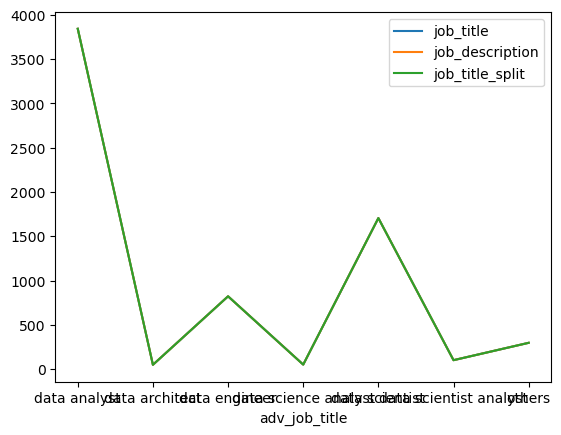

In [1377]:
master_df.groupby(master_df['adv_job_title']).count().plot()

In [1379]:
#master_df.query('adv_job_title=="data analyst"')

In [1380]:
#master_df.query('job_title_split=="data data"')

In [1382]:
master_df.head()

,job_title,job_description,job_title_split,adv_job_title
0,"data analyst, center on immigration and justic...",Are you eager to roll up your sleeves and harn...,data analyst,data analyst
1,quality data analyst,Overview\n\nProvides analytical and technical ...,data analyst,data analyst
2,"senior data analyst, insights & analytics team...",We’re looking for a Senior Data Analyst who ha...,data analyst analytics,data analyst
3,data analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,data analyst,data analyst
4,reporting data analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,data analyst,data analyst
